In [3]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]
../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]


In [4]:
print(Rel_pUncert)

{'pp': array([0.18152603]), 'p-Pb': array([0.11831406])}


In [5]:
print ZYAM_Min_i
print dPhi_Bins[ZYAM_Min_i]
print ZYAM_Max_i
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)
print(delta_phi_centers)
print(dphi_start_integral)

1
0.392699081699
4
1.57079632679
[12, 40]
[0.19634954084936207, 0.5890486225480862, 0.9817477042468103, 1.3744467859455345, 1.7671458676442586, 2.1598449493429825, 2.552544031041707, 2.945243112740431]
7


In [6]:
print dPhi_Width

0.392699081699


In [7]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [8]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [9]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [10]:
#Plot_Sub_UB_Overlay(Corrs)
#Plot_Sub_UB_SR(Corrs)

In [11]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [12]:
#Plot_UB()

**Pedestal Subtraction**

In [13]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [14]:
Ped_Sub_After_Cs(Corrs)

In [15]:
reload(functions_correlations)
from functions_correlations import *

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


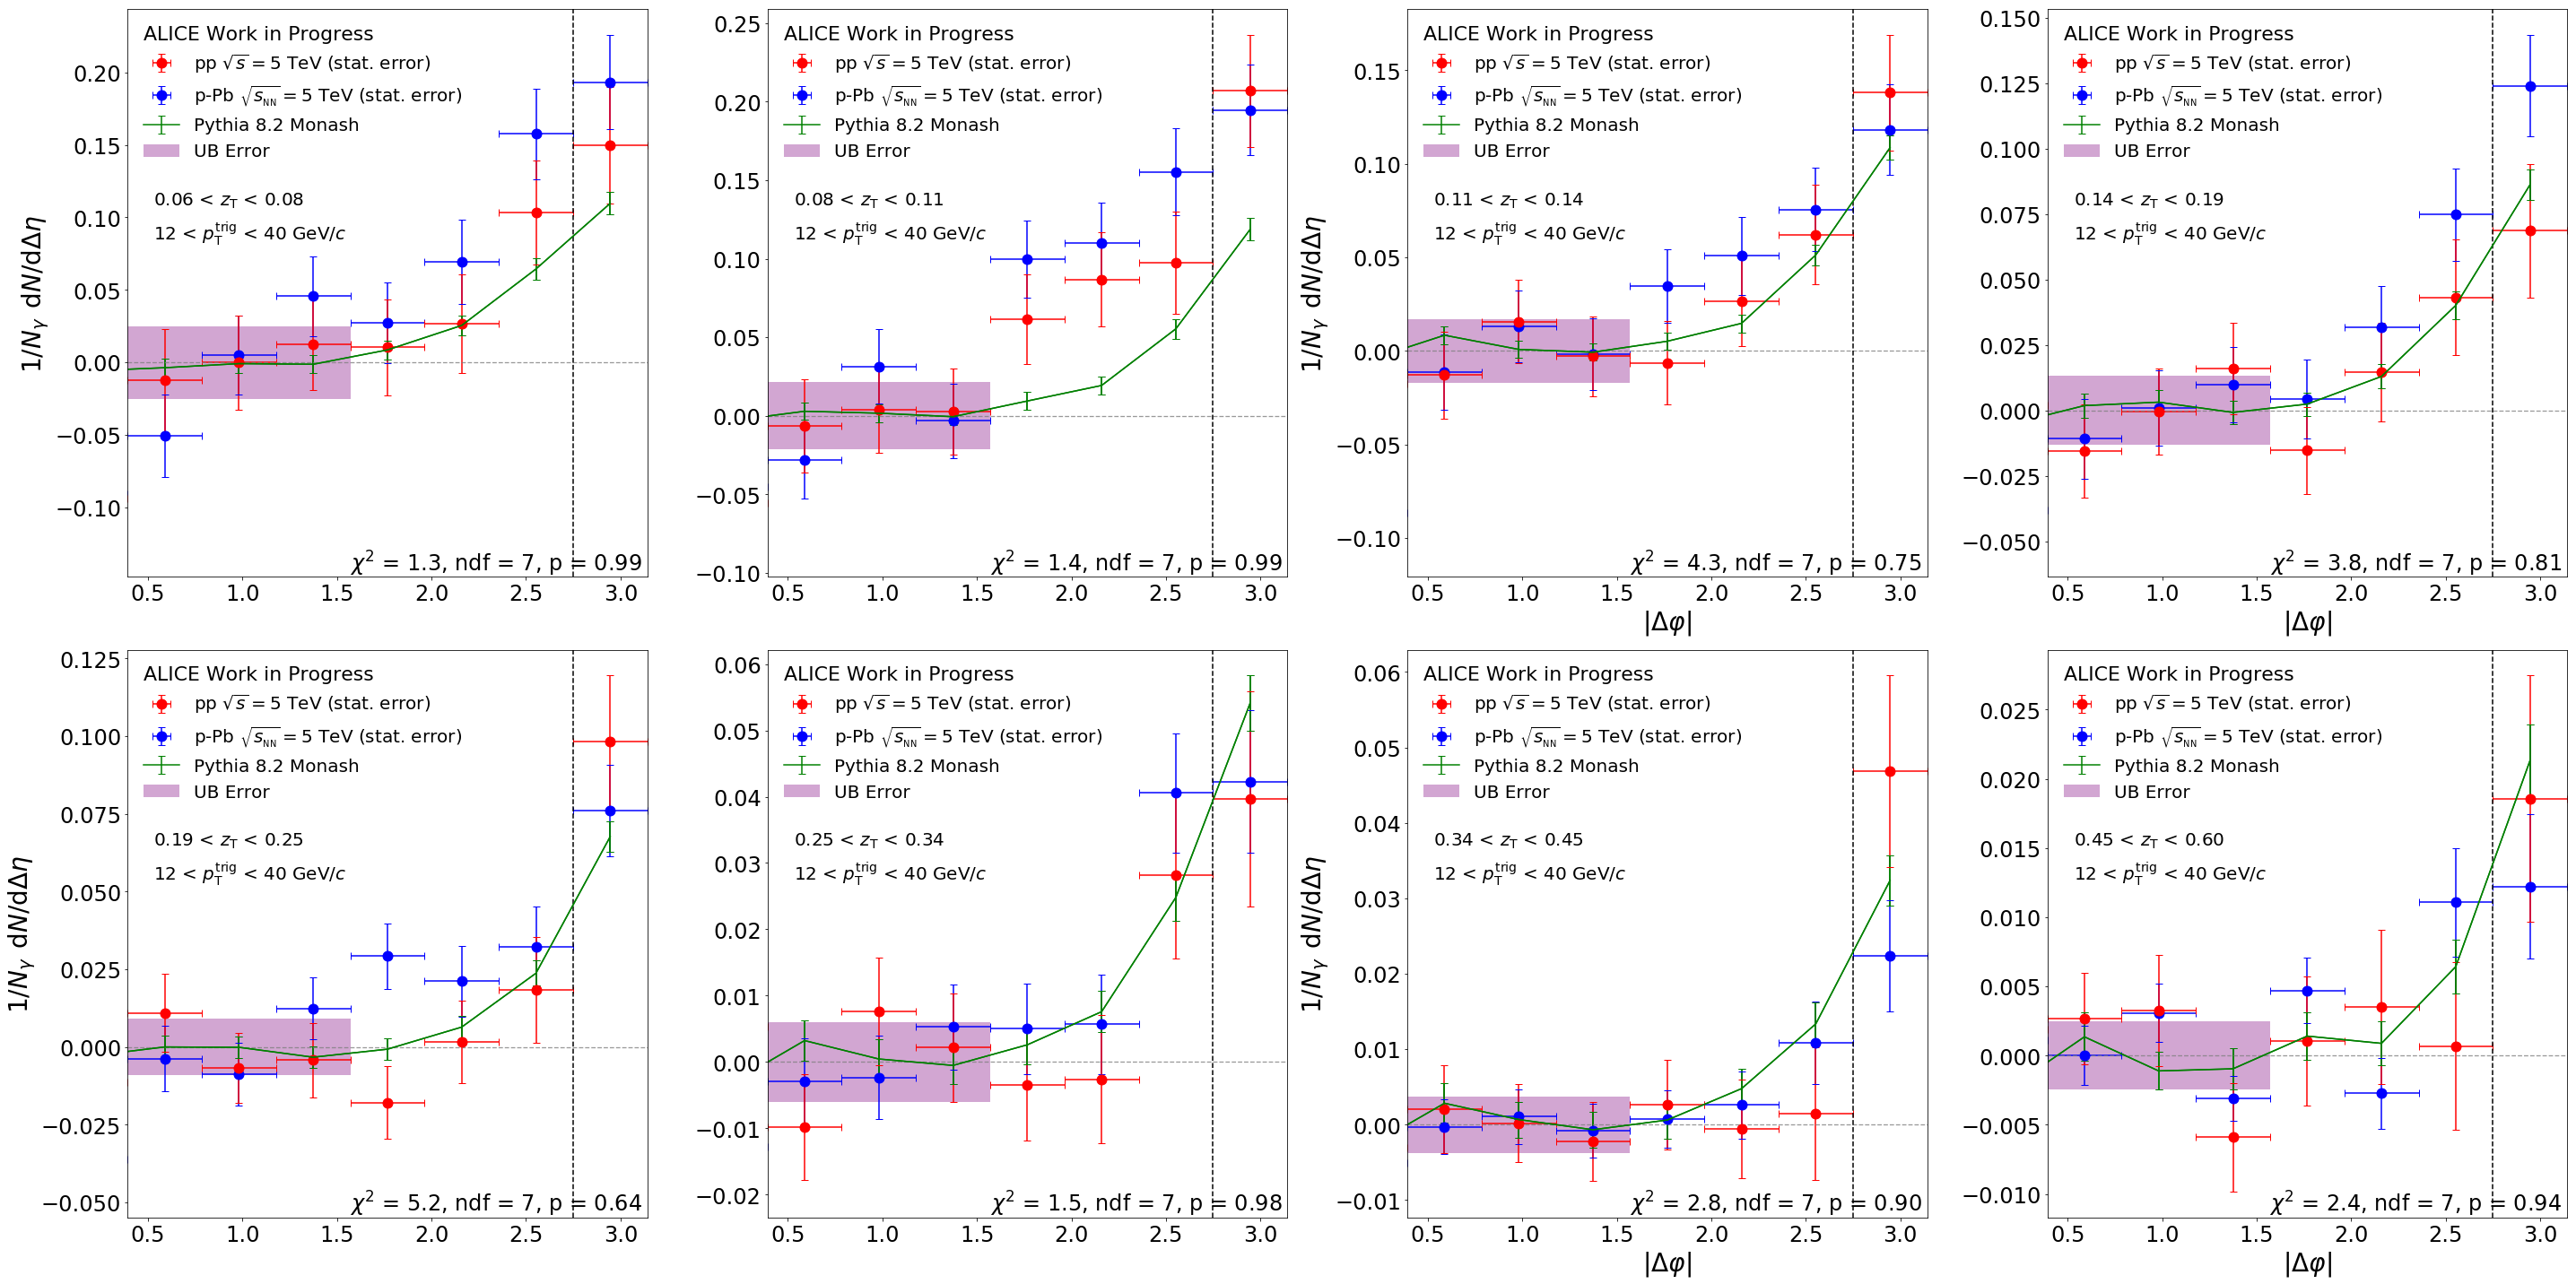

In [16]:
Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs) #NOOOOTTTTTTEEEE
#Compare_Cs_pTBins()

**Debugging**

In [17]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][5][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][5][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][5][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][5][1]))

Number of Away side bins = 1
[ 0.00212157 -0.01557953 -0.00053544  0.01611497 -0.01531357  0.01454932
  0.04312501  0.06858797]
pp
0.101096 +\- 0.041337 +\- 0.011938
0.4255984484963636
non-dphi rate 0.014
p-Pb
0.107634 +\- 0.027324 +\- 0.009449
0.2686137996829656
non-dphi rate 0.011


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [18]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [19]:
reload(functions_correlations)
from functions_correlations import *

In [20]:
list = [18,8,5.6]
list = [18,9,5.6]
list = [18,6,5.6]
list = [18,21,5.6]
list = [12,6,5.6,5]
list = [12,10,5.6,5]
list = [12,7,5.6,5]
list = [12,8,5.6,5]
quad_sum = 0
for i in list:
    quad_sum += i**2

quad_sum = math.sqrt(quad_sum)
print(quad_sum)
    

16.2591512694


In [21]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [22]:
Frags = Get_Fragmentation(Corrs)
LaTeX_Results_Summary(Frags)
LaTeX_Ratio_Systematics(Frags)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

[[0.9608766  0.60245435 0.36791211 0.20791283 0.10969077 0.05580942
  0.02760709 0.01445976]]
                        LaTeX Table
0
4
5
8
Source   &  pp data & p--Pb~data  \\
Statistical Uncertainty & 19\%-40\% & 28\%-49\% & 16\%-23\% & 27\%-44\% \\
\hline
Purity & 18\%-18\% & 18\%-18\% & 12\%-12\% & 12\%-12\% \\
UE & 8\%-15\% & 7\%-12\% & 7\%-10\% & 9\%-9\% \\
Tracking Efficiency &  5.6\% & 5.6\%  \\ 
Total Sys & 21\%-24\% & 20\%-22\% & 15\%-16\% & 16\%-16\% \\
Total Uncertainty & 28\%-47\% & 34\%-54\% & 22\%-28\% & 31\%-47\% \\
pp


$\zt$ interval  & Statistics  & UE Estimate  & Purity   & Tracking Efficiency \\
\hline
0.06--0.08 & 35\% & 15\% & 22\% & 8\% & 5\%\\
0.08--0.11 & 25\% & 11\% & 22\% & 8\% & 5\%\\
0.11--0.14 & 33\% & 13\% & 22\% & 8\% & 5\%\\
0.14--0.19 & 43\% & 16\% & 22\% & 8\% & 5\%\\
0.19--0.25 & 31\% & 11\% & 22\% & 8\% & 5\%\\
0.25--0.34 & 50\% & 15\% & 22\% & 8\% & 5\%\\
0.34--0.45 & 44\% & 11\% & 22\% & 8\% & 5\%\\
0.45--0.60 & 66\% & 15\% & 22\% & 8\% & 5\%\\
p-P

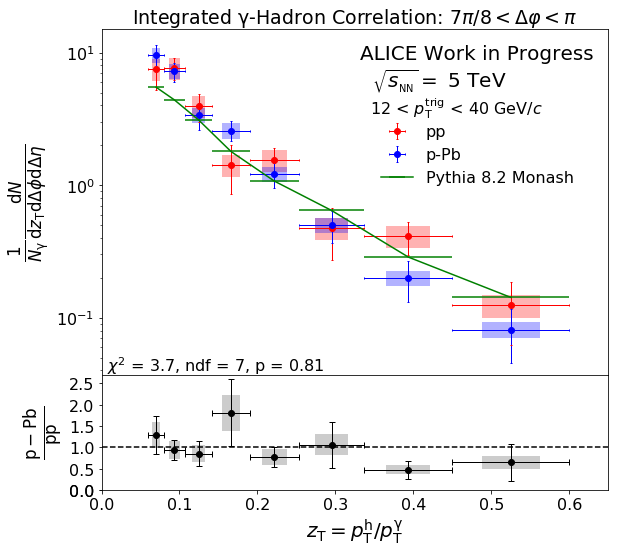

pp_purity_FF_Errors:
1.3607, 1.3910, 0.7157, 0.2594, 0.2829, 0.0858, 0.0753, 0.0225, 

p-Pb_FF_Errors:
1.8184, 1.1817, 0.7647, 0.4429, 0.2533, 0.1352, 0.0678, 0.0356, 

pp_FF_Errors:
2.2304, 1.4567, 0.9589, 0.5707, 0.3558, 0.2011, 0.1156, 0.0612, 

p-Pb_UE_FF_Errors:
0.7989, 0.5117, 0.3214, 0.1773, 0.0942, 0.0442, 0.0186, 0.0076, 

pp_FF:
7.4960, 7.6627, 3.9429, 1.4289, 1.5586, 0.4726, 0.4147, 0.1237, 

p-Pb_FF:
9.6662, 7.2158, 3.3785, 2.5843, 1.2066, 0.5032, 0.1984, 0.0814, 

pp_UE_FF_Errors:
0.9609, 0.6025, 0.3679, 0.2079, 0.1097, 0.0558, 0.0276, 0.0145, 

p-Pb_purity_FF_Errors:
1.1436, 0.8537, 0.3997, 0.3058, 0.1428, 0.0595, 0.0235, 0.0096, 



In [23]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

#print(Combined_Frags.keys())

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)


printthis = False
if printthis == True:
    print("zT Centers:")
    for izt in zT_centers:
        print("%1.2f,"%(izt)),
    print("")

    print("zT Widths:")
    for izt in zT_widths:
        print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

In [24]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [25]:
LaTeX_Table(Combined_Frags)

$z_\mathrm{T}$ Range & pp $\pm$ Stat. $\pm$ Sys & p--Pb $\pm$ Stat. $\pm$ Sys. \\
\hline
0.06--0.08 & 7.50$ \pm$ 2.23 (stat.) $\pm$1.42 (sys.) & 9.67$ \pm$ 1.82 (stat.) $\pm$1.27 (sys.)\\
0.08--0.11 & 7.66$ \pm$ 1.46 (stat.) $\pm$1.46 (sys.) & 7.22$ \pm$ 1.18 (stat.) $\pm$0.94 (sys.)\\
0.11--0.14 & 3.94$ \pm$ 0.96 (stat.) $\pm$0.75 (sys.) & 3.38$ \pm$ 0.76 (stat.) $\pm$0.44 (sys.)\\
0.14--0.19 & 1.43$ \pm$ 0.57 (stat.) $\pm$0.27 (sys.) & 2.58$ \pm$ 0.44 (stat.) $\pm$0.34 (sys.)\\
0.19--0.25 & 1.56$ \pm$ 0.36 (stat.) $\pm$0.30 (sys.) & 1.21$ \pm$ 0.25 (stat.) $\pm$0.16 (sys.)\\
0.25--0.34 & 0.47$ \pm$ 0.20 (stat.) $\pm$0.09 (sys.) & 0.50$ \pm$ 0.14 (stat.) $\pm$0.07 (sys.)\\
0.34--0.45 & 0.41$ \pm$ 0.12 (stat.) $\pm$0.08 (sys.) & 0.20$ \pm$ 0.07 (stat.) $\pm$0.03 (sys.)\\
0.45--0.60 & 0.12$ \pm$ 0.06 (stat.) $\pm$0.02 (sys.) & 0.08$ \pm$ 0.04 (stat.) $\pm$0.01 (sys.)\\


In [26]:
a = 730/521
a = 0.0730/0.0521
print(1.0/a)
7.7810
b = 1.1465/7.7810
print(b)

0.713698630137
0.147346099473


In [27]:
print(purity_Uncertainty["pp"])

[0.04808325]


[0.21111047 0.17762167 0.14753435 0.12336292 0.10911249 0.1087555
 0.12241357 0.14621048 0.17608244 0.20944605 0.24487827 0.28159933
 0.31916469 0.35730816 0.39586265 0.43471882 0.47380245 0.51306157
 0.55245877 0.59196647]
0.772697672993


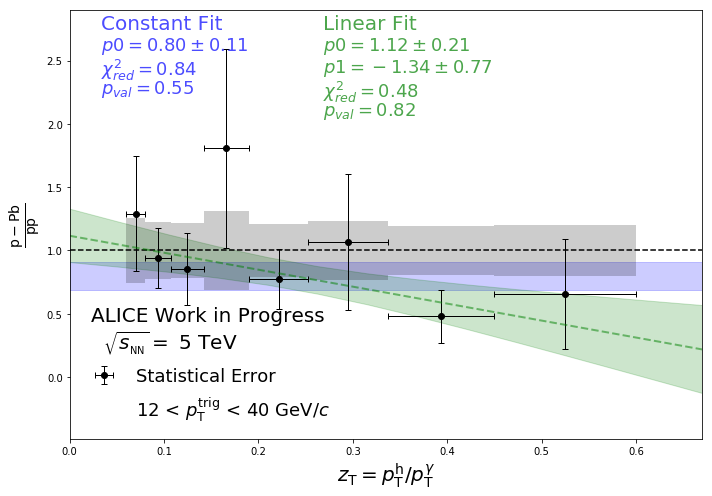

                Central Values:
[1.28952001 0.94167509 0.85686821 1.80860588 0.77413497 1.06466275
 0.47841622 0.65759981]

                Satistical Uncertainty Absolute:
[0.45393902 0.23628284 0.28468554 0.78597855 0.24008496 0.53581993
 0.21095817 0.43406015]

               Relative Satistical Uncertainty:
[0.3520217  0.25091759 0.33223958 0.43457702 0.31013321 0.50327668
 0.44095113 0.66006733]

                Ratio Uncertainty from Purity:
[0.23712613 0.21298978 0.20791709 0.28060763 0.20332393 0.22094971
 0.19014637 0.19749697]

                Ratio Uncertainty from Single Track Efficiency:
[0.10212477 0.07457686 0.0678605  0.14323428 0.06130836 0.08431699
 0.03788863 0.05207925]

                Full Systematic Uncertainty:
[0.25818263 0.22566869 0.21871114 0.31505032 0.21236604 0.23649129
 0.19388448 0.20424814]

                 Relative Full Systematic:
[0.20021607 0.23964602 0.25524478 0.17419512 0.2743269  0.22212789
 0.40526317 0.31059641]

                LaTeX Table:

In [28]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

In [29]:
save_name = "Beam_Flip"
strings = ["zT_Rebin_8_006zT06zTITSSubpPb","zT_Rebin_8_006zT06zTITSSubPbp","zT_Rebin_8_006zT06zTITSSub"]
string_descriptions = ["p-Pb","Pb-p","Total"]
colors = ["crimson","mediumslateblue","black"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "Chi2_Comparison"
strings = ["zT_Rebin_8_006zT06zT13fnew","zT_Rebin_8_006zT06zT13fnewChi2"]
string_descriptions = ["Chi2<36","Chi2 < 2"]
colors = ["crimson","mediumslateblue","black"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "Chi2_Comparison_NoWeights"
strings = ["zT_Rebin_8_006zT06zT13fnewChi36noWeights","zT_Rebin_8_006zT06zT13fnewChi2noWeights"]
string_descriptions = ["Chi2 < 36 (No Weights)","Chi2 < 2 (No Weights)"]
colors = ["red","blue","green"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "Comparison_Weight_NoWeights"
strings = ["zT_Rebin_8_006zT06zT13fnewChi36noWeights","zT_Rebin_8_006zT06zT13fnew"]
string_descriptions = ["Chi2 < 36 (No Weights)","Chi2 < 36 "]
colors = ["royalblue","lime","black"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "pileup_cut"
strings = ["zT_Rebin_8_006zT06zTITSSub","zT_Rebin_8_006zT06zTpileCut"]
string_descriptions = ["No Cut","Pile Up Cut","Total"]
colors = ["crimson","mediumslateblue","black"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "13f_old_new"
strings = ["zT_Rebin_8_006zT06zTITSSub","zT_Rebin_8_006zT06zT13fnew"]
string_descriptions = ["Old","New"]
colors = ["crimson","mediumslateblue","black"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
save_name = "Max_pT"
strings = ["zT_Rebin_8_006zT06zTITSSub","zT_Rebin_8_006zT06zT8GeV","zT_Rebin_8_006zT06zT6GeV"]
string_descriptions = ["Track pT < 10 GeV/c","Track pT < 8 GeV/c","Track pT < 6 GeV/c"]
colors = ["blue","red","green"]
#Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [ ]:
#TPC_Centrals = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTpileCut.npy")
#TPC_Errors = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTpileCut.npy")
#TPC_Sys = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTpileCut.npy")

#ITS_Centrals = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTITSsub.npy")
#ITS_Errors = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTITSsub.npy")
#ITS_Sys = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTITSsub.npy")
Use_Corrections=False

TPC_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnewChi36noWeights.npy")
TPC_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnewChi36noWeights.npy")
TPC_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnewChi36noWeights.npy")

ITS_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnewChi2noWeights.npy")
ITS_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnewChi2noWeights.npy")
ITS_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnewChi2noWeights.npy")

if (Use_Corrections):
    TPC_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnew.npy")
    TPC_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnew.npy")
    TPC_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnew.npy")

    ITS_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnewChi2.npy")
    ITS_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnewChi2.npy")
    ITS_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnewChi2.npy")

#TPC_Centrals = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnew.npy")
#TPC_Errors = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnew.npy")
#TPC_Sys = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnew.npy")

#ITS_Centrals = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zT13fnewChi2.npy")
#ITS_Errors = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT13fnewChi2.npy")
#ITS_Sys = np.load("npy_files/LO_pp_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zT13fnewChi2.npy")



ITS_Rel_Erorr = ITS_Errors/ITS_Centrals
TPC_Rel_Erorr = TPC_Errors/TPC_Centrals



print("ITS Errors = "),
print(ITS_Rel_Erorr) 
print("TPC Errors = "),
print(TPC_Rel_Erorr)  

plot_power = False
Colors = ["red","blue","black"]
fig = plt.figure(figsize=(8,8))
    
fig.add_axes((0.1,0.3,0.88,0.6))
        
plt.errorbar(zT_centers, ITS_Centrals,xerr=zT_widths,yerr=ITS_Errors,linewidth=1, fmt='o',color="blue",capsize=1,label=r"$\chi^2$ < 36 (Corrected) ")
ITS_Eff = 0.056*ITS_Centrals
ITS_Full_Sys = np.sqrt(ITS_Eff**2 + ITS_Sys**2)
Sys_Plot_ITS = plt.bar(zT_centers, ITS_Full_Sys+ITS_Full_Sys,
bottom=ITS_Centrals-ITS_Full_Sys,width=zT_widths, align='center',color="blue",alpha=0.3)
    
plt.errorbar(zT_centers, TPC_Centrals,xerr=zT_widths,yerr=TPC_Errors,linewidth=1, fmt='o',color="red",capsize=1,label=r"$\chi^2$ < 2 (Corrected)")
TPC_Eff = 0.056*TPC_Centrals
TPC_Full_Sys = np.sqrt(TPC_Eff**2 + TPC_Sys**2)
Sys_Plot_TPC = plt.bar(zT_centers, TPC_Full_Sys+TPC_Full_Sys,
bottom=TPC_Centrals-TPC_Full_Sys,width=zT_widths, align='center',color="red",alpha=0.3)
    
#plt.errorbar(zT_centers[:NzT-ZT_OFF_PLOT],pythia_FF,xerr=zT_widths[:NzT-ZT_OFF_PLOT],fmt='-g',label="Pythia 8.2 Monash")     

plt.yscale('log')                             
plt.ylabel(r"$\frac{1}{N_{\mathrm{\gamma}}}\frac{\mathrm{d}N}{\mathrm{d}z_{\mathrm{T}}\mathrm{d}\Delta\phi\mathrm{d}\Delta\eta}$",fontsize=24)
plt.ylim(0.037,15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=0)
plt.xlim(0,0.65)

        
    #Chi2 and Labels
    #purity_normalization = np.full(len(Comb_Dict["pp_Combined_FF"][:NzT-ZT_OFF_PLOT]),math.sqrt(0.15**2+0.056**2)) #estimate of constant normalization Error
    #pp_sys_Error = (Comb_Dict["pp_Combined_FF"][:NzT-ZT_OFF_PLOT])*math.sqrt(Rel_pUncert["pp"]**2+0.056**2)
    #p_Pb_sys_Error = (Comb_Dict["p-Pb_Combined_FF"][:NzT-ZT_OFF_PLOT])*math.sqrt(Rel_pUncert["p-Pb"]**2+0.056**2)
    #pp_sys_Error = purity_normalization
    #p-Pb_sys_Error = purity_normalization
    
Chi2,NDF,Pval = Get_pp_pPb_List_Chi2(ITS_Centrals,
                                         ITS_Errors,
                                         ITS_Full_Sys,
                                         TPC_Centrals,
                                         TPC_Errors,
                                         TPC_Full_Sys)

#plt.annotate("$\chi^2$ = %1.1f, ndf = %i, p = %1.2f"%(Chi2,NDF,Pval), xy=(0.01, 0.06), xycoords='axes fraction', ha='left', va='top', fontsize=16)
    #plt.annotate("$\chi^2$ = %1.1f, ndf = %i, p = %f"%(Chi2,NDF,Pval), xy=(0.99, 0.06), xycoords='axes fraction', ha='right', va='top', fontsize=16)
    
    #plt.annotate("%s"%(description_string),xy=(0.01,0.1),xycoords="axes fraction",ha="left",va="top",fontsize=12)
    
leg = plt.legend(numpoints=1,frameon=True,edgecolor='white', framealpha=0.0, fontsize=16)
leg.set_title("ALICE Work in Progress\n  $\sqrt{s_{\mathrm{_{NN}}}} = $ 5 TeV \n")
plt.setp(leg.get_title(),fontsize=20)
plt.annotate("%1.0f < $p_\mathrm{T}^{\mathrm{trig}}$ < %1.0f GeV/$c$"%(pTbins[0],pTbins[N_pT_Bins]),xy=(0.53, 0.81), xycoords='axes fraction', ha='left', va='top', fontsize=16)
    
crap_boxes = False
if (crap_boxes):
        plt.text(0.441, 2.92, '__',
         {'color': 'black', 'alpha': 0.0, 'fontsize': 16, 'ha': 'left', 'va': 'top',
          'bbox': dict(boxstyle="square", fc='red',alpha=0.3, ec="None", pad=0.2)})
        plt.text(0.441, 1.95, '__',
         {'color': 'black','alpha':0.0, 'fontsize': 16, 'ha': 'left', 'va': 'top',
          'bbox': dict(boxstyle="square", fc="blue",alpha=0.3, ec="None", pad=0.2)})

#plt.title(r'p-Pb Integrated $\mathrm{\gamma}$-Hadron Correlation: $%s < \Delta\varphi < \pi$ '%(Phi_String),fontdict = {'fontsize' : 19})
plt.title(r'p-Pb Integrated $\mathrm{\gamma}$-Hadron: $\chi^2$ Max 36 Vs. 2 Corrected',fontdict = {'fontsize' : 19})
    
fig.add_axes((0.1,0.1,0.88,0.2))

pPb_Combined = ITS_Centrals
pPb_Combined_Errors = ITS_Errors
pPb_purity_Uncertainty = ITS_Full_Sys
    
pp_Combined = TPC_Centrals
pp_Combined_Errors = TPC_Errors
pp_purity_Uncertainty = TPC_Full_Sys
    
Ratio = pPb_Combined/pp_Combined
Ratio_Error = np.sqrt((pPb_Combined_Errors/pPb_Combined)**2 + (pp_Combined_Errors/pp_Combined)**2)*Ratio
Ratio_Plot = plt.errorbar(zT_centers[:NzT-ZT_OFF_PLOT], Ratio[:NzT-ZT_OFF_PLOT], yerr=Ratio_Error[:NzT-ZT_OFF_PLOT],xerr=zT_widths[:NzT-ZT_OFF_PLOT], fmt='ko',capsize=3, ms=6,lw=1)
    
        #Save
    #np.save("npy_files/%s_Averaged_FF_Ratio_%s.npy"%(Shower,description_string),Ratio)
    #np.save("npy_files/%s_Averaged_FF_Ratio_Errors_%s.npy"%(Shower,description_string),Ratio_Error)
    
Purity_Uncertainty = np.sqrt((pp_purity_Uncertainty/pp_Combined)**2 + (pPb_purity_Uncertainty/pPb_Combined)**2)*Ratio
Efficiency_Uncertainty = np.ones(len(pPb_Combined))*0.056*math.sqrt(2)*Ratio 
if (CorrectedP):
    Ratio_Systematic = np.sqrt(Purity_Uncertainty**2 + Efficiency_Uncertainty**2)
    
#Sys_Plot = plt.bar(zT_centers[:NzT-ZT_OFF_PLOT], Ratio_Systematic[:NzT-ZT_OFF_PLOT]+Ratio_Systematic[:NzT-ZT_OFF_PLOT],
            #bottom=Ratio[:NzT-ZT_OFF_PLOT]-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=zt_box[:NzT-ZT_OFF_PLOT], align='center',edgecolor="k",color='w')
#            bottom=Ratio[:NzT-ZT_OFF_PLOT]-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=zT_widths[:NzT-ZT_OFF_PLOT], align='center',color='black',alpha=0.2)
    
    #Sys_Plot = plt.bar(zT_centers[:NzT-ZT_OFF_PLOT], 2*Ratio_Systematic[:NzT-ZT_OFF_PLOT], 
    #   bottom=1.0-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=2*zT_widths[:NzT-ZT_OFF_PLOT], align='center',color='black',alpha = 0.2)
    
    
plt.axhline(y=1, color='k', linestyle='--')
    
plt.xlabel("${z_\mathrm{T}} = p_\mathrm{T}^{\mathrm{h}}/p_\mathrm{T}^\gamma$",fontsize=20)
plt.ylabel(r"$\frac{\mathrm{ No\ Cut}}{\mathrm{Pile\ Up\ Cut}}$",fontsize=24)
plt.ylabel(r"$\frac{\mathrm{ \chi^2 < 2}}{\mathrm{\chi^2 < 36}}$",fontsize=24)
#plt.ylim((-0.0, 2.7))
#plt.ylim(0.5,1.5)
plt.ylim(0.8,1.1)
plt.xlabel("${z_\mathrm{T}} = p_\mathrm{T}^\mathrm{h}/p_\mathrm{T}^\mathrm{\gamma}$",fontsize=20)
plt.xticks(fontsize=16)
#plt.yticks([0,0,0.5,1.0,1.5,2.0,2.5],fontsize=16)
plt.xlim(0,0.65)

    #model_p-Pb = Fit_FF_PowerLaw(Comb_Dict,"p-Pb")
    #plt.plot(zT_centers[:NzT-ZT_OFF_PLOT], model_pp, 'g:')
        #plt.yscale("log")
    
plt.gcf()
#plt.tight_layout()
#plt.savefig("pics/%s/%s/ISO_Compare_Final_FFunction_and_Ratio.pdf"%(Shower,description_string), bbox_inches = "tight")
plt.show()

In [ ]:
#Compare Isolation Only
TPC_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTTPCIso.npy")
TPC_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTTPCIso.npy")
TPC_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTTPCIso.npy")

ITS_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTITSsub.npy")
ITS_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTITSsub.npy")
ITS_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTITSsub.npy")


TPC_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTTPCTRACKS.npy")
TPC_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTTPCTRACKS.npy")
TPC_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTTPCTRACKS.npy")

ITS_Centrals = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_zT_Rebin_8_006zT06zTITSsub.npy")
ITS_Errors = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTITSsub.npy")
ITS_Sys = np.load("npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Systematics_zT_Rebin_8_006zT06zTITSsub.npy")

ITS_Rel_Erorr = ITS_Errors/ITS_Centrals
TPC_Rel_Erorr = TPC_Errors/TPC_Centrals



print("ITS Errors = "),
print(ITS_Rel_Erorr) 
print("TPC Errors = "),
print(TPC_Rel_Erorr)  

plot_power = False
Colors = ["red","blue","black"]
fig = plt.figure(figsize=(8,8))
    
fig.add_axes((0.1,0.3,0.88,0.6))
        
plt.errorbar(zT_centers, ITS_Centrals,xerr=zT_widths,yerr=ITS_Errors,linewidth=1, fmt='o',color="blue",capsize=1,label="ITS")
ITS_Eff = 0.056*ITS_Centrals
ITS_Full_Sys = np.sqrt(ITS_Eff**2 + ITS_Sys**2)
Sys_Plot_ITS = plt.bar(zT_centers, ITS_Full_Sys+ITS_Full_Sys,
bottom=ITS_Centrals-ITS_Full_Sys,width=zT_widths, align='center',color="blue",alpha=0.3)
    
plt.errorbar(zT_centers, TPC_Centrals,xerr=zT_widths,yerr=TPC_Errors,linewidth=1, fmt='o',color="red",capsize=1,label="TPC")
TPC_Eff = 0.056*TPC_Centrals
TPC_Full_Sys = np.sqrt(TPC_Eff**2 + TPC_Sys**2)
Sys_Plot_TPC = plt.bar(zT_centers, TPC_Full_Sys+TPC_Full_Sys,
bottom=TPC_Centrals-TPC_Full_Sys,width=zT_widths, align='center',color="red",alpha=0.3)
    
#plt.errorbar(zT_centers[:NzT-ZT_OFF_PLOT],pythia_FF,xerr=zT_widths[:NzT-ZT_OFF_PLOT],fmt='-g',label="Pythia 8.2 Monash")     

plt.yscale('log')                             
plt.ylabel(r"$\frac{1}{N_{\mathrm{\gamma}}}\frac{\mathrm{d}N}{\mathrm{d}z_{\mathrm{T}}\mathrm{d}\Delta\phi\mathrm{d}\Delta\eta}$",fontsize=24)
plt.ylim(0.037,15)
plt.yticks(fontsize=16)
plt.xticks(fontsize=0)
plt.xlim(0,0.65)

        
    #Chi2 and Labels
    #purity_normalization = np.full(len(Comb_Dict["pp_Combined_FF"][:NzT-ZT_OFF_PLOT]),math.sqrt(0.15**2+0.056**2)) #estimate of constant normalization Error
    #pp_sys_Error = (Comb_Dict["pp_Combined_FF"][:NzT-ZT_OFF_PLOT])*math.sqrt(Rel_pUncert["pp"]**2+0.056**2)
    #p_Pb_sys_Error = (Comb_Dict["p-Pb_Combined_FF"][:NzT-ZT_OFF_PLOT])*math.sqrt(Rel_pUncert["p-Pb"]**2+0.056**2)
    #pp_sys_Error = purity_normalization
    #p-Pb_sys_Error = purity_normalization
    
Chi2,NDF,Pval = Get_pp_pPb_List_Chi2(ITS_Centrals,
                                         ITS_Errors,
                                         ITS_Full_Sys,
                                         TPC_Centrals,
                                         TPC_Errors,
                                         TPC_Full_Sys)

#plt.annotate("$\chi^2$ = %1.1f, ndf = %i, p = %1.2f"%(Chi2,NDF,Pval), xy=(0.01, 0.06), xycoords='axes fraction', ha='left', va='top', fontsize=16)
    #plt.annotate("$\chi^2$ = %1.1f, ndf = %i, p = %f"%(Chi2,NDF,Pval), xy=(0.99, 0.06), xycoords='axes fraction', ha='right', va='top', fontsize=16)
    
    #plt.annotate("%s"%(description_string),xy=(0.01,0.1),xycoords="axes fraction",ha="left",va="top",fontsize=12)
    
leg = plt.legend(numpoints=1,frameon=True,edgecolor='white', framealpha=0.0, fontsize=16)
leg.set_title("ALICE Work in Progress\n  $\sqrt{s_{\mathrm{_{NN}}}} = $ 5 TeV \n")
plt.setp(leg.get_title(),fontsize=20)
plt.annotate("%1.0f < $p_\mathrm{T}^{\mathrm{trig}}$ < %1.0f GeV/$c$"%(pTbins[0],pTbins[N_pT_Bins]),xy=(0.53, 0.81), xycoords='axes fraction', ha='left', va='top', fontsize=16)
    
crap_boxes = False
if (crap_boxes):
        plt.text(0.441, 2.92, '__',
         {'color': 'black', 'alpha': 0.0, 'fontsize': 16, 'ha': 'left', 'va': 'top',
          'bbox': dict(boxstyle="square", fc='red',alpha=0.3, ec="None", pad=0.2)})
        plt.text(0.441, 1.95, '__',
         {'color': 'black','alpha':0.0, 'fontsize': 16, 'ha': 'left', 'va': 'top',
          'bbox': dict(boxstyle="square", fc="blue",alpha=0.3, ec="None", pad=0.2)})

plt.title(r'p-Pb Integrated $\mathrm{\gamma}$-Hadron Correlation: $%s < \Delta\varphi < \pi$ '%(Phi_String),fontdict = {'fontsize' : 19})
    
fig.add_axes((0.1,0.1,0.88,0.2))

pPb_Combined = ITS_Centrals
pPb_Combined_Errors = ITS_Errors
pPb_purity_Uncertainty = ITS_Full_Sys
    
pp_Combined = TPC_Centrals
pp_Combined_Errors = TPC_Errors
pp_purity_Uncertainty = TPC_Full_Sys
    
Ratio = pPb_Combined/pp_Combined
Ratio_Error = np.sqrt((pPb_Combined_Errors/pPb_Combined)**2 + (pp_Combined_Errors/pp_Combined)**2)*Ratio

Ratio_Error = Ratio_Error*0
Ratio_Plot = plt.errorbar(zT_centers[:NzT-ZT_OFF_PLOT], Ratio[:NzT-ZT_OFF_PLOT], yerr=Ratio_Error[:NzT-ZT_OFF_PLOT],xerr=zT_widths[:NzT-ZT_OFF_PLOT], fmt='ko',capsize=3, ms=6,lw=1)
    
        #Save
    #np.save("npy_files/%s_Averaged_FF_Ratio_%s.npy"%(Shower,description_string),Ratio)
    #np.save("npy_files/%s_Averaged_FF_Ratio_Errors_%s.npy"%(Shower,description_string),Ratio_Error)
    
Purity_Uncertainty = np.sqrt((pp_purity_Uncertainty/pp_Combined)**2 + (pPb_purity_Uncertainty/pPb_Combined)**2)*Ratio
Efficiency_Uncertainty = np.ones(len(pPb_Combined))*0.056*math.sqrt(2)*Ratio 
if (CorrectedP):
    Ratio_Systematic = np.sqrt(Purity_Uncertainty**2 + Efficiency_Uncertainty**2)
 
Ratio_Systematic = Ratio_Systematic*0
Sys_Plot = plt.bar(zT_centers[:NzT-ZT_OFF_PLOT], Ratio_Systematic[:NzT-ZT_OFF_PLOT]+Ratio_Systematic[:NzT-ZT_OFF_PLOT],
            #bottom=Ratio[:NzT-ZT_OFF_PLOT]-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=zt_box[:NzT-ZT_OFF_PLOT], align='center',edgecolor="k",color='w')
            bottom=Ratio[:NzT-ZT_OFF_PLOT]-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=zT_widths[:NzT-ZT_OFF_PLOT], align='center',color='black',alpha=0.2)
    
    #Sys_Plot = plt.bar(zT_centers[:NzT-ZT_OFF_PLOT], 2*Ratio_Systematic[:NzT-ZT_OFF_PLOT], 
    #   bottom=1.0-Ratio_Systematic[:NzT-ZT_OFF_PLOT], width=2*zT_widths[:NzT-ZT_OFF_PLOT], align='center',color='black',alpha = 0.2)
    
    
plt.axhline(y=1, color='k', linestyle='--')
    
plt.xlabel("${z_\mathrm{T}} = p_\mathrm{T}^{\mathrm{h}}/p_\mathrm{T}^\gamma$",fontsize=20)
plt.ylabel(r"$\frac{\mathrm{ ITS}}{\mathrm{TPC}}$",fontsize=24)
plt.ylim((-0.0, 2.7))
plt.xlabel("${z_\mathrm{T}} = p_\mathrm{T}^\mathrm{h}/p_\mathrm{T}^\mathrm{\gamma}$",fontsize=20)
plt.xticks(fontsize=16)
plt.yticks([0,0,0.5,1.0,1.5,2.0,2.5],fontsize=16)
plt.xlim(0,0.65)

    #model_p-Pb = Fit_FF_PowerLaw(Comb_Dict,"p-Pb")
    #plt.plot(zT_centers[:NzT-ZT_OFF_PLOT], model_pp, 'g:')
        #plt.yscale("log")
    
plt.gcf()
#plt.tight_layout()
plt.savefig("pics/%s/%s/ISO_Compare_Final_FFunction_and_Ratio.pdf"%(Shower,description_string), bbox_inches = "tight")
plt.show()

In [ ]:
from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

In [ ]:
save_name = "Phi_Rebinning"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zT16dPhi"]
string_descriptions = ["8dPhi","16dPhi","pp"]
colors = ["red","green","black"]
#Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)